In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import glob
import seaborn as sns
import numpy as np
#import os
#from scipy import stats
#from scipy.stats import mannwhitneyu


Read data from a combined file. 

In [2]:
df = pd.read_excel('data_combined_by_source.xlsx')

PPIDR Data needs to be multiplied by 100 once

In [3]:
df['Pondr-Fit(oDistProt)_PPDR'] = df['Pondr-Fit(oDistProt)_PPDR']*100

Set up order and palette for a plotting function

In [4]:

my_order = ['ML Aging-related', 'ML Aging not-related','Control','Longevity Regulating Pathway','GenAge', 'Ageing Brain', 'Chaperome', 'Gene Ontology Aging', 'Gene Expression Review', 'Proteomics Review', 'Enzymes']
my_pal = {"Enzymes": "sienna", "GenAge": "rebeccapurple", "Gene Ontology Aging": "seagreen", "Longevity Regulating Pathway": "lightyellow","ML Aging-related": "tan", "ML Aging not-related": "lightgreen", "Control": "palevioletred", "Proteomics Review": "gray", "Chaperome": "b","Gene Expression Review": "g","Ageing Brain": "r"}

Define a plotting function

In [5]:
def make_a_graph_with_order_PPDR(data, y, x, title, my_order):
    medians = data.groupby(by=[x], sort = False)[y].median()
    
    #medians.sort_values(ascending=False, inplace=True)
    
    plt.figure(figsize=(20, 10))
    bplot = sns.violinplot(y=y, x=x, 
                 data=data, 
                 width=1.25,inner=None, showfliers=False, order = my_order, palette = my_pal)
    
    xlim = bplot.get_xlim()
    ylim = bplot.get_ylim()
    
    for violin in bplot.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        y_1=max(y0,-10)
        violin.set_clip_path(plt.Rectangle((x0, y_1), width / 2, min(height, 110-y_1), transform=bplot.transData))
        
        
    sns.boxplot(y=y, x=x, data=data, showfliers=False,
            width=0.3, linewidth=2, color = 'black',order = my_order, boxprops={'zorder': 10, 'facecolor': 'none'}, ax=bplot)
    old_len_collections = len(bplot.collections)
    
    sns.stripplot(y=y, x=x, color='black',  s=5, marker="o", linewidth=1, alpha=.5,
                 data=data,  order = my_order)
    
    for dots in bplot.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    
    sns.set_context("paper", rc={"font.size":25,"axes.titlesize":10,"axes.labelsize":5})
    bplot.set_xlabel(str(x), fontsize=0)
    bplot.set_ylabel(r'Predicted Percent of Intrinsically Disordered Residues' + '\n' + '(PPIDR,%)', fontsize=23)
    
    bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30, horizontalalignment="right")
    bplot.tick_params(labelsize=18)
    #bplot.set_ylim([-10, 110]) 
    a = []
    for i in my_order:
        a.append(len(data[data[x] == i]))

    nobs = a
    nobs = [str(x) for x in nobs]
    nobs = ["n: " + i for i in nobs]
 
 
    
    
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,my_order):
        bplot.text(pos[tick],  115, nobs[tick],
        horizontalalignment='center', fontsize = 14, color='black', weight='semibold')
        
    for tick,label in zip(pos,my_order):
        bplot.plot([pos[tick] - 0.25,pos[tick] + 0.25],  [medians[label],medians[label]], color='black', linestyle='-', linewidth=3 )
    bplot.set_xlim(xlim)
    bplot.set_ylim([-10, 110]) 
    #plt.savefig(str(title) + '.pdf', bbox_inches = "tight")
    print(medians.sort_values(ascending=True))
    

Call the function and add stars manually. The number of stars depends on the results of statistical tests (carried out in a separate notebook).

Источник
Enzymes                         12.168142
Proteomics Review               15.757576
Gene Expression Review          16.655180
ML Aging not-related            19.592720
Gene Ontology Aging             20.245758
Chaperome                       21.685083
Ageing Brain                    21.769257
GenAge                          22.801040
ML Aging-related                24.633950
Longevity Regulating Pathway    24.947146
Control                         26.380438
Name: Pondr-Fit(oDistProt)_PPDR, dtype: float64


Text(0.5, 102.01, '**')

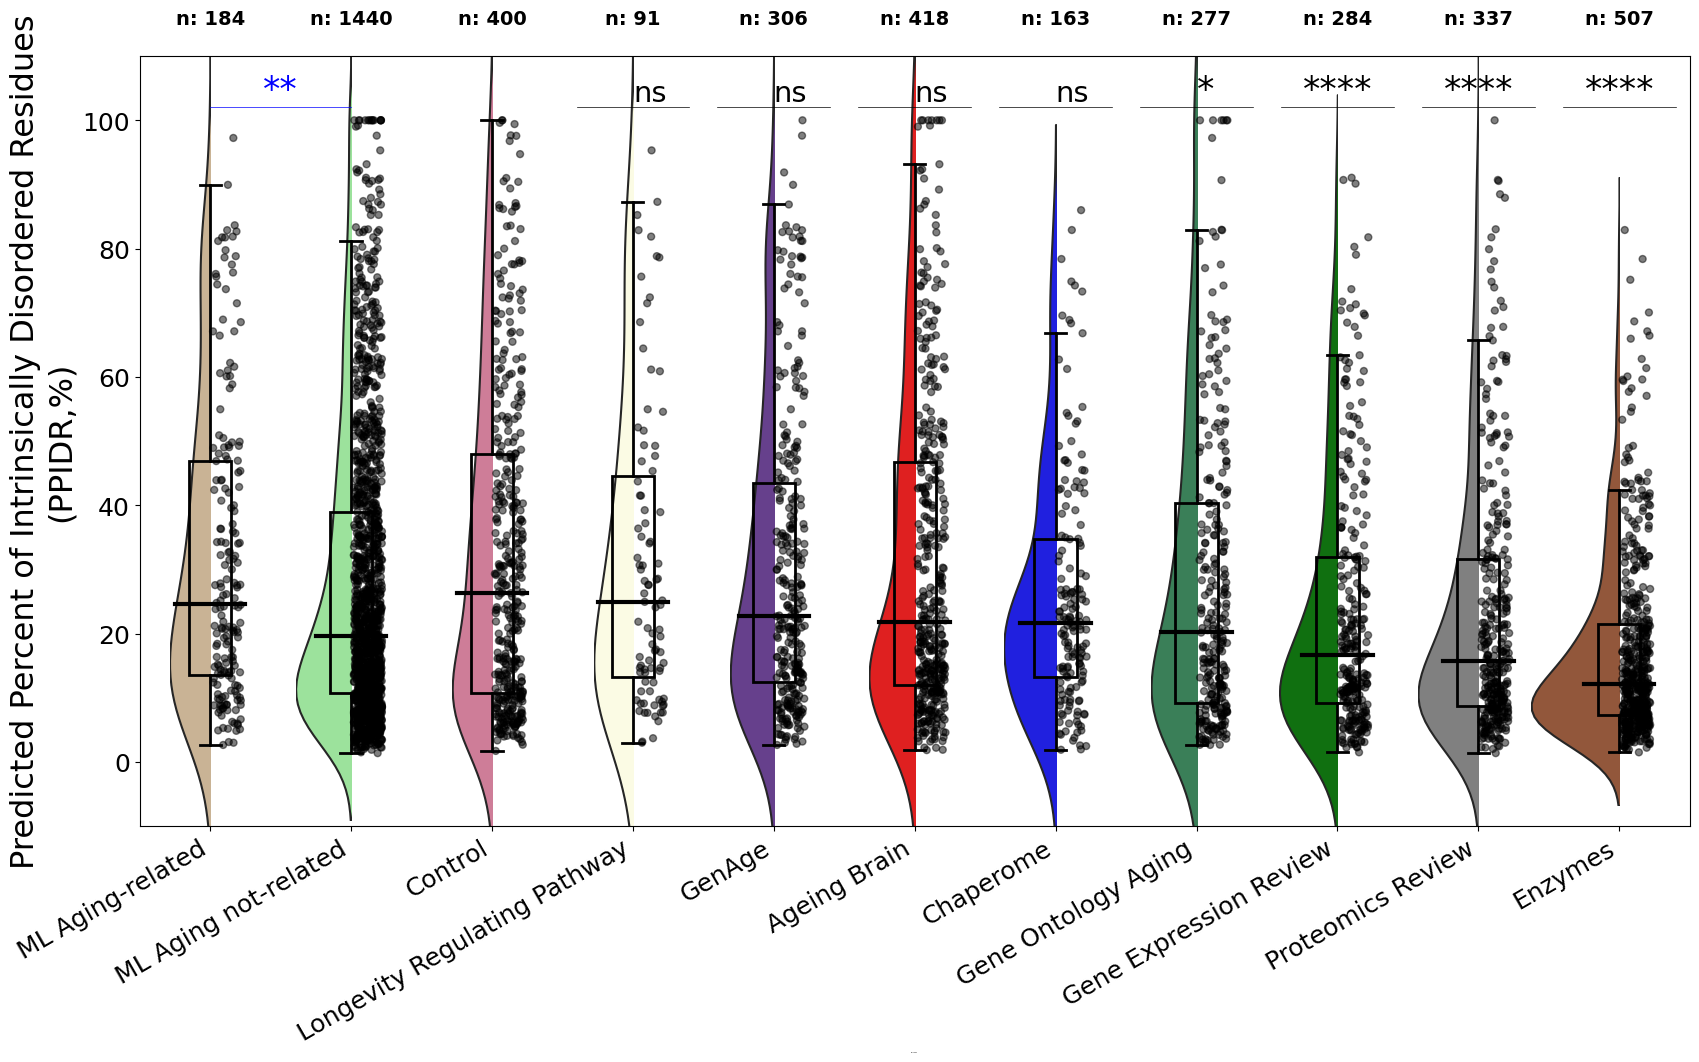

In [6]:
make_a_graph_with_order_PPDR(df, 'Pondr-Fit(oDistProt)_PPDR','Источник','1a', my_order)

x1, x2 = 2.6, 3.4   #  'LR' vs Control Random Dataset
y, h, col = 102, 0, 'k'  # y - height, h - length of a vertical barrier, col - color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='left', va='bottom', color=col, size = 'small')

x1, x2 = 3.6, 4.4    #  'GenAge' vs Control Random Dataset
y, h, col = 102, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='left', va='bottom', color=col, size = 'small')

x1, x2 = 4.6, 5.4   #  'Ageing Brain' vs Control Random Dataset
y, h, col = 102, 0, 'k'  # y - height, h - length of a vertical barrier, col - color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='left', va='bottom', color=col, size = 'small')

x1, x2 = 5.6, 6.4   #  'Chaperome' vs Control Random Dataset
y, h, col = 102, 0, 'k'  # y - height, h - length of a vertical barrier, col - color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='left', va='bottom', color=col, size = 'small')

x1, x2 = 6.6, 7.4   #  'GO Aging' vs Control Random Dataset
y, h, col = 102, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='left', va='bottom', color=col)

x1, x2 = 7.6, 8.4   #  'Gene Expression' vs Control Random Dataset
y, h, col = 102, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x1, x2 = 8.6, 9.4   #  'Proteomics' vs Control Random Dataset
y, h, col = 102, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x1, x2 = 9.6, 10.4   #  'Enzymes' vs Control Random Dataset
y, h, col = 102, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x1, x2 = 0, 1 #  'ML Aging related' vs 'Ml aging non-related'
y, h, col = 102, 0.01, 'b'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

#plt.savefig('Violin_plots.jpg', bbox_inches='tight')

In [7]:
from scipy import stats
x1 = [1,2,1,1,1,1,1,1,1,1,2,4,1,1]
x2 = [3,3,4,3,1,2,3,1,1,5,4]
w, p_value = stats.brunnermunzel(x1, x2)
w

3.1374674823029505

In [34]:
x1= np.array(df[df['Источник']=='Control']['Pondr-Fit(oDistProt)_PPDR'])
x2 = np.array(df[df['Источник']=='Enzymes']['Pondr-Fit(oDistProt)_PPDR'])
x3= np.array(df[df['Источник']=='Proteomics Review']['Pondr-Fit(oDistProt)_PPDR'])
x4= np.array(df[df['Источник']=='Gene Expression Review']['Pondr-Fit(oDistProt)_PPDR'])
x5 = np.array(df[df['Источник']=='Gene Ontology Aging']['Pondr-Fit(oDistProt)_PPDR'])
x6=np.array(df[df['Источник']=='ML Aging-related']['Pondr-Fit(oDistProt)_PPDR'])
x7=np.array(df[df['Источник']=='ML Aging not-related']['Pondr-Fit(oDistProt)_PPDR'])

In [37]:
w, p_value = stats.brunnermunzel(x6, x7)
p_value

0.0024078390538859974